11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Feature matrix (x_train): (60000, 28, 28)
Target matrix (y_train): (60000,)
Feature matrix (x_test): (10000, 28, 28)
Target matrix (y_test): (10000,)


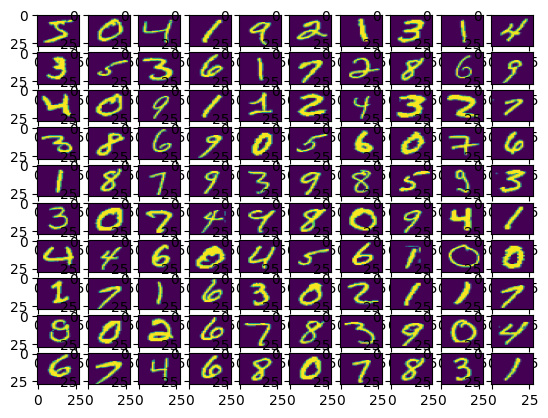

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.2681 - loss: 2.2475 - val_accuracy: 0.6263 - val_loss: 1.7519
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6904 - loss: 1.5813 - val_accuracy: 0.8063 - val_loss: 1.0627
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8080 - loss: 0.9738 - val_accuracy: 0.8641 - val_loss: 0.6867
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8578 - loss: 0.6622 - val_accuracy: 0.8882 - val_loss: 0.5042
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8835 - loss: 0.5013 - val_accuracy: 0.8995 - val_loss: 0.4117
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8972 - loss: 0.4136 - val_accuracy: 0.9053 - val_loss: 0.3588
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9026 - loss: 0.3669 - val_accuracy: 0.9137 - val_loss: 0.3230
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9100 - loss: 0.3382 - val_accuracy: 0.9190 - val_loss: 0.

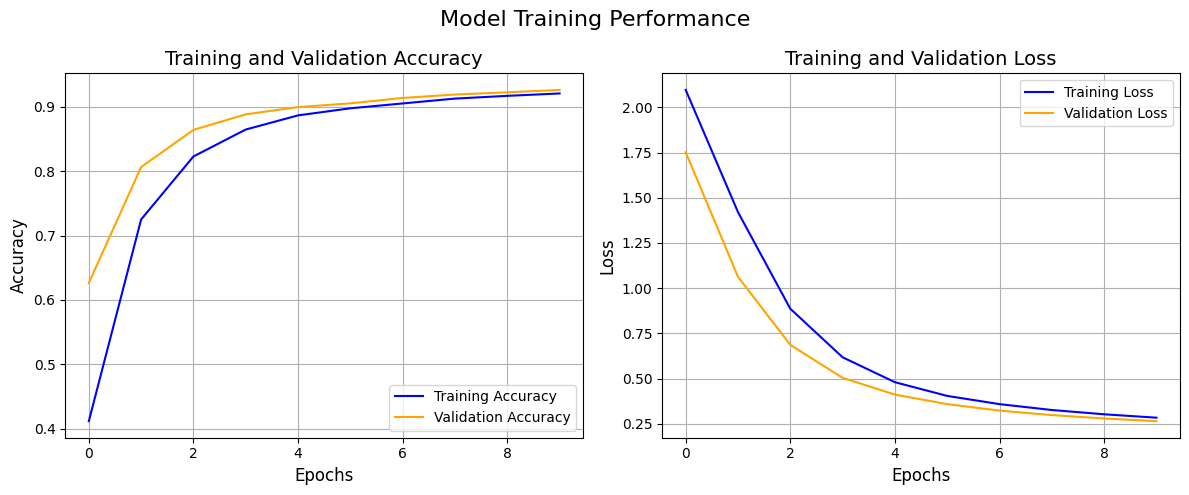

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

gray_scale = 255

x_train = x_train.astype('float32') / gray_scale
x_test = x_test.astype('float32') / gray_scale

print("Feature matrix (x_train):", x_train.shape)
print("Target matrix (y_train):", y_train.shape)
print("Feature matrix (x_test):", x_test.shape)
print("Target matrix (y_test):", y_test.shape)

fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
   for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), aspect='auto')
        k += 1
plt.show()

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

mod = model.fit(x_train, y_train, epochs=10,
          batch_size=2000,
          validation_split=0.2)

print(mod)

results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss, Test accuracy:', results)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(mod.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(mod.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(mod.history['loss'], label='Training Loss', color='blue')
plt.plot(mod.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout()
plt.show()
